In [54]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [55]:
tennis_data<-read_csv("atp2017-2019.csv")

glimpse(tennis_data)

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 6,866
Columns: 50
$ ...1               <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…
$ tourney_id         <chr> "2019-M020", "2019-M020", "2019-M020", "2019-M020",…
$ tourney_name       <chr> "Brisbane", "Brisbane", "Brisbane", "Brisbane", "Br…
$ surface            <chr> "Hard", "Hard", "Hard", "Hard", "Hard", "Hard", "Ha…
$ draw_size          <dbl> 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,…
$ tourney_level      <chr> "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "…
$ tourney_date       <dbl> 20181231, 20181231, 20181231, 20181231, 20181231, 2…
$ match_num          <dbl> 300, 299, 298, 297, 296, 295, 294, 293, 292, 291, 2…
$ winner_id          <dbl> 105453, 106421, 105453, 104542, 106421, 104871, 105…
$ winner_seed        <chr> "2", "4", "2", NA, "4", NA, "2", NA, "7", "4", "5",…
$ winner_entry       <chr> NA, NA, NA, "PR", NA, NA, NA, "PR", NA, NA, NA, NA,…
$ winner_name        <chr> "Kei Nishikori", "Daniil Medvedev", "Kei Nishikori"…
$ winner_hand   

In [70]:
filtered_data<- tennis_data|>
                select(tourney_id,winner_name,winner_ioc, w_ace,w_df,w_svpt,winner_rank,winner_rank_points,surface,l_ace,w_1stWon,w_1stIn,l_1stWon)|>
                mutate(winner_ioc=as_factor(winner_ioc))|>
                mutate(total_aces=w_ace+l_ace)|>
                mutate(total_first_won=w_1stWon+l_1stWon)
filtered_data

tourney_id,winner_name,winner_ioc,w_ace,w_df,w_svpt,winner_rank,winner_rank_points,surface,l_ace,w_1stWon,w_1stIn,l_1stWon,total_aces,total_first_won
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-M020,Kei Nishikori,JPN,3,3,77,9,3590,Hard,8,31,44,34,11,65
2019-M020,Daniil Medvedev,RUS,10,1,52,16,1977,Hard,17,28,33,36,27,64
2019-M020,Kei Nishikori,JPN,2,2,47,9,3590,Hard,10,26,33,15,12,41
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2017-M-DC-2017-WG-M-BEL-FRA-01,Jo Wilfried Tsonga,FRA,12,2,64,15,2320,Hard,1,31,33,30,13,61
2017-M-DC-2017-WG-M-BEL-FRA-01,David Goffin,BEL,1,0,122,7,3775,Hard,10,47,71,44,11,91
2017-M-DC-2017-WG-M-BEL-FRA-01,Lucas Pouille,FRA,7,1,57,18,2235,Hard,1,34,38,29,8,63


Warning message:
“Removed 3 rows containing missing values (geom_point).”


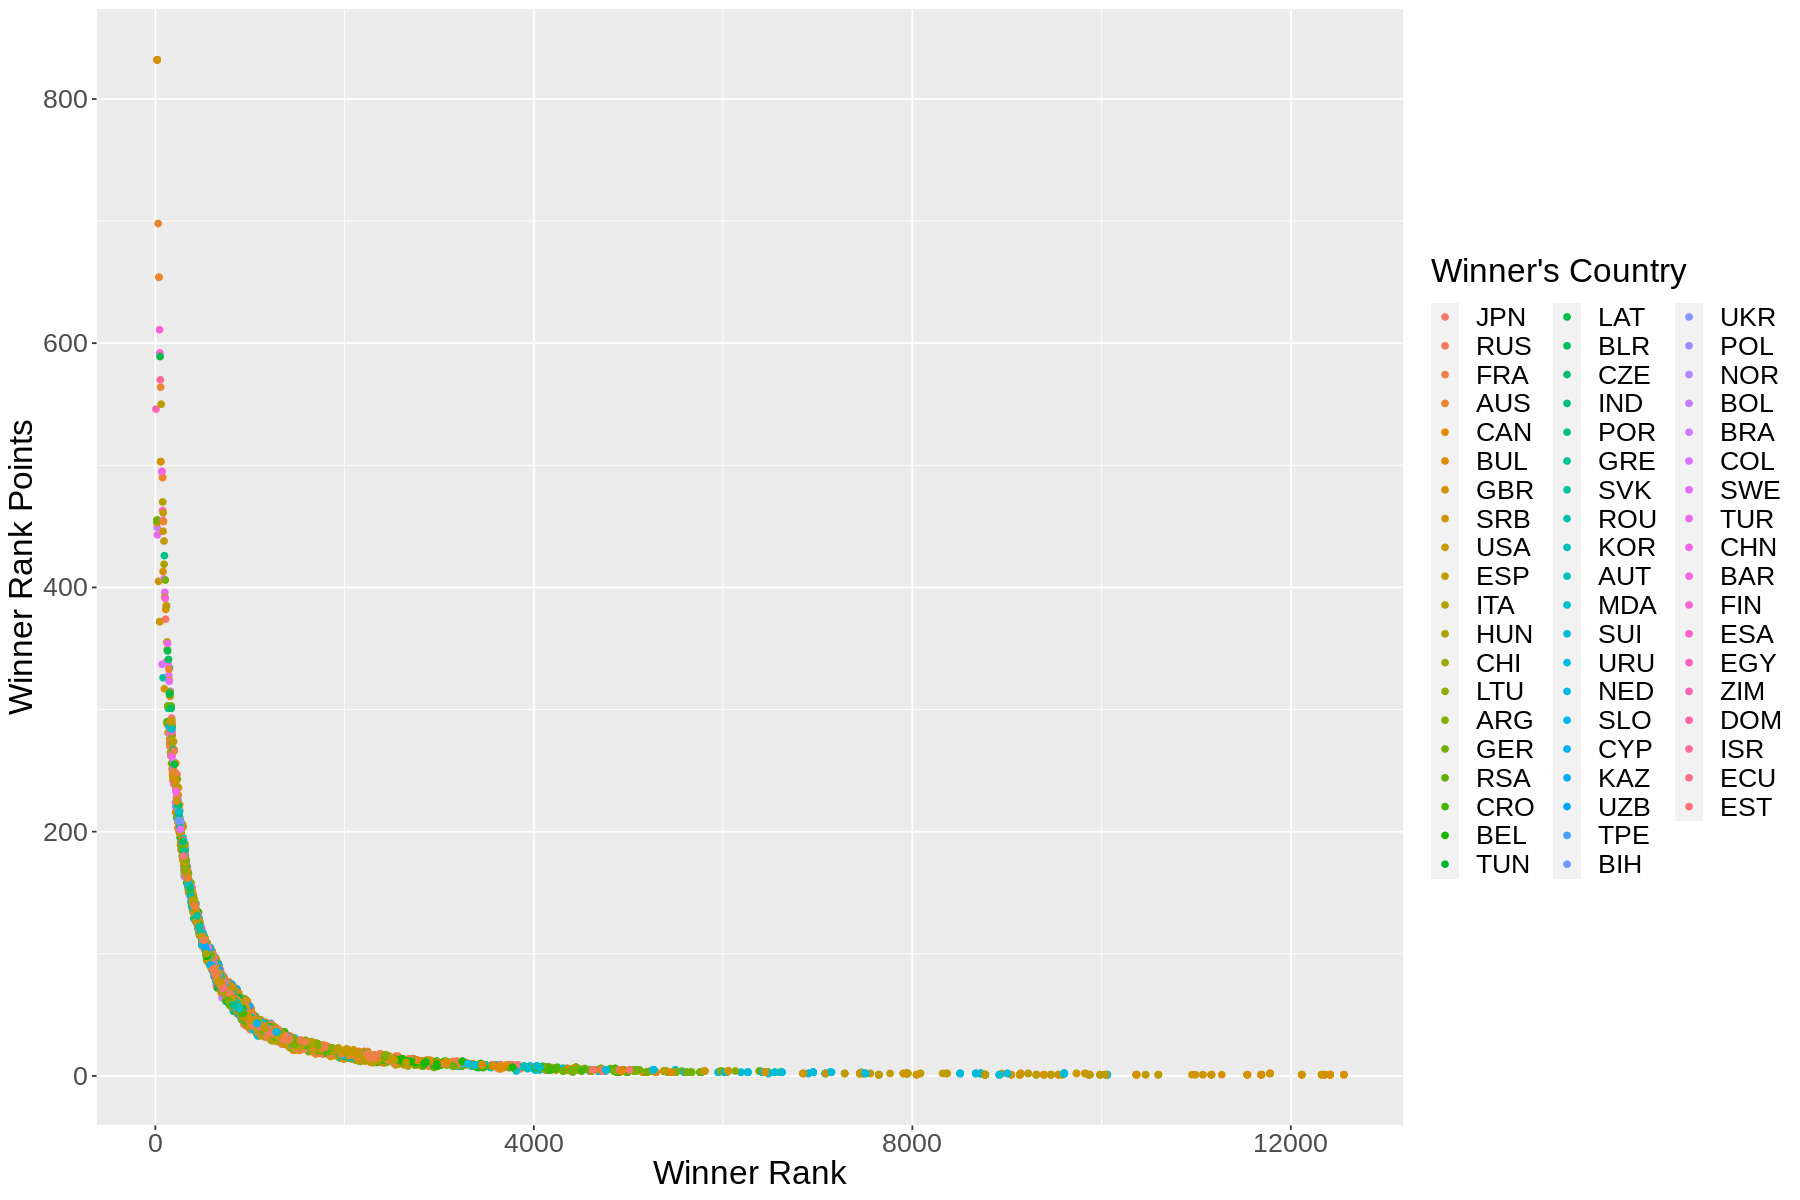

In [62]:
options(repr.plot.width = 15, repr.plot.height = 10)

filtered_data_plot<-filtered_data|>
                    ggplot(aes(x=winner_rank_points,y=winner_rank,color=winner_ioc))+
                    geom_point()+
                    labs(x="Winner Rank",y="Winner Rank Points",color="Winner's Country")+
                    theme(text=element_text(size=20))

filtered_data_plot

Warning message:
“Removed 85 rows containing missing values (geom_point).”


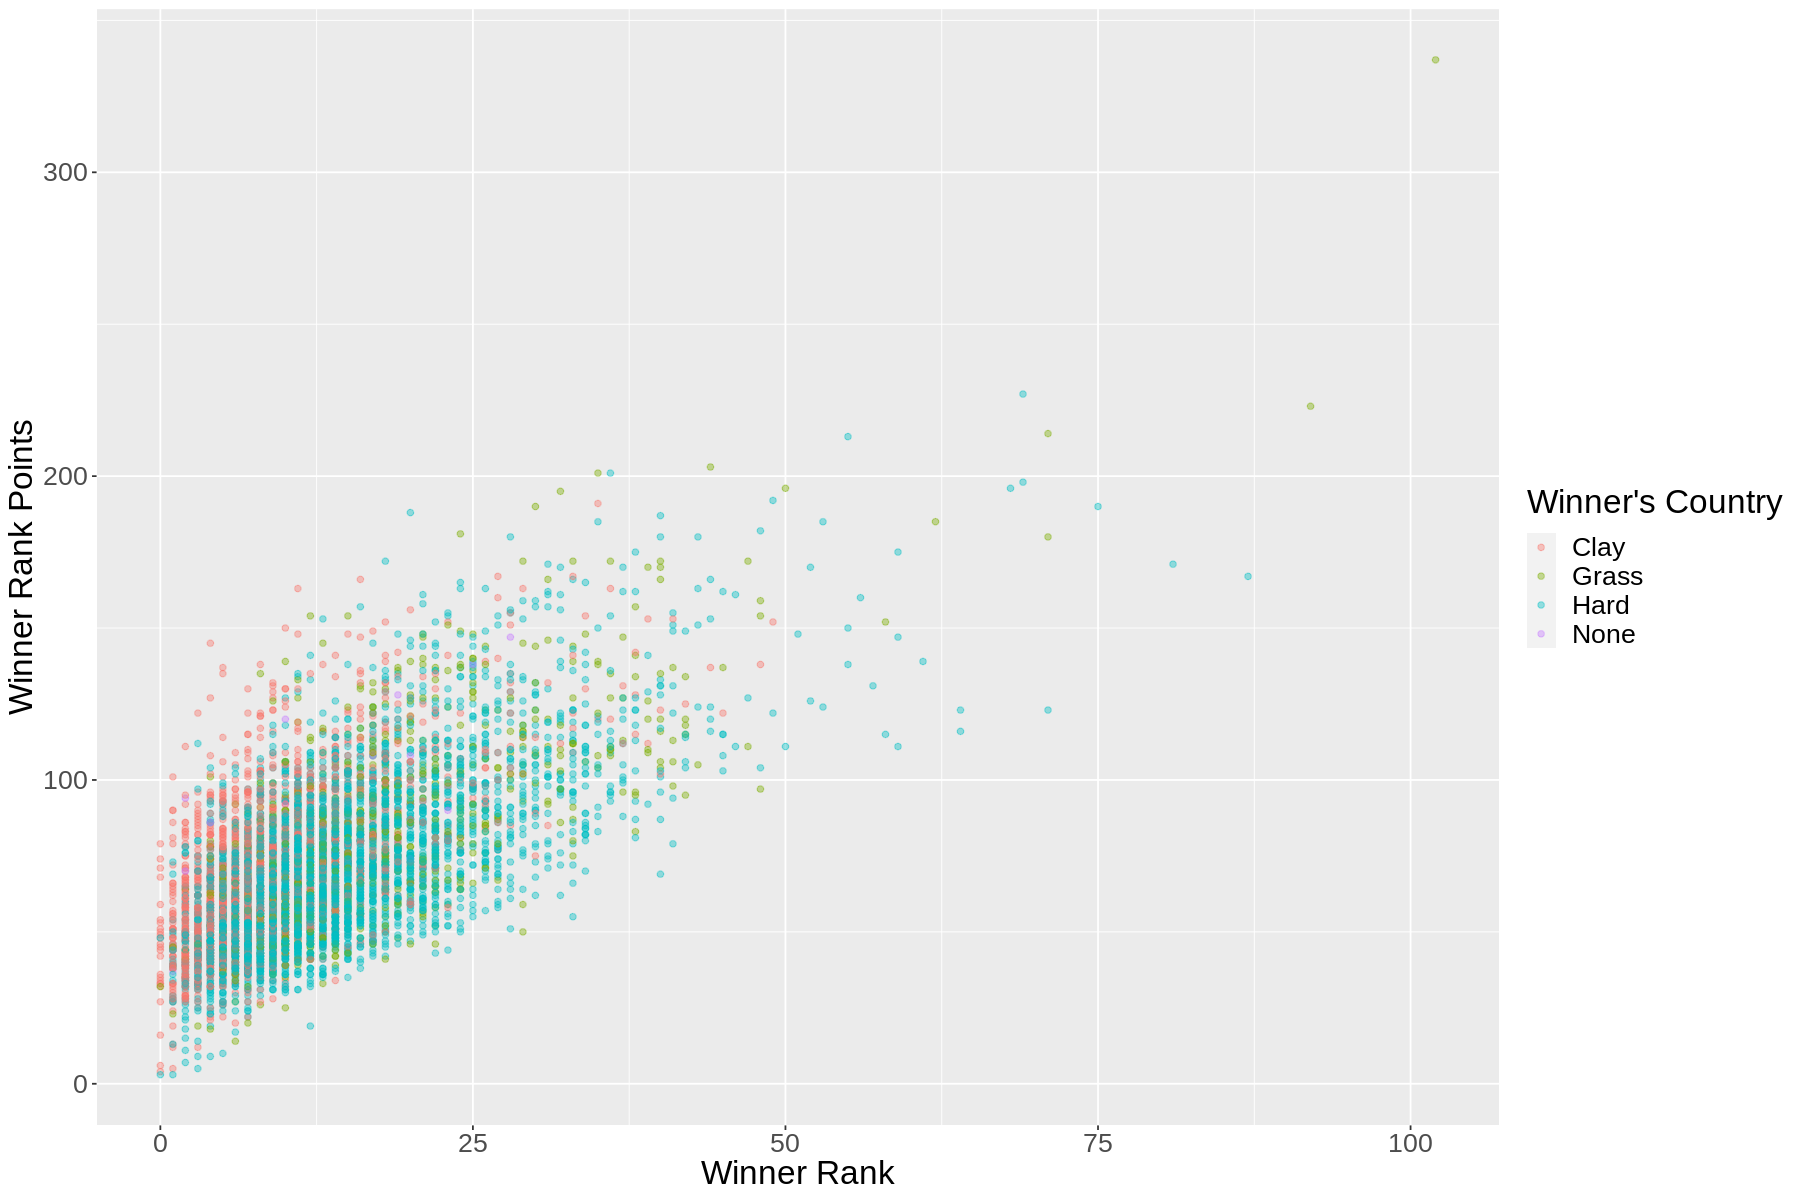

In [72]:
filtered_data_plot<-filtered_data|>
                    ggplot(aes(x=total_aces,y=total_first_won,color=surface))+
                    geom_point(alpha=0.4)+
                    labs(x="Winner Rank",y="Winner Rank Points",color="Winner's Country")+
                    theme(text=element_text(size=20))

filtered_data_plot